In [168]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cycler import cycler

In [169]:
dF = pd.read_csv('data.csv')

In [170]:
dF

,V tupla (mV),T tupla (grados),R 10k (Kohms),T 10k (grados),R 100k (kOhm),T 100k (grados),T pt100 (grados),R pt100 [Ohm],T LM [C],V LM [mV],T diodo [C],V diodo[mV],T Cu [C],R Cu [ohm]
0,0.3,33.0,5.12,40.0,122.1,20,20,109,25.0,358.0,25.0,552.0,25.0,183.0
1,0.4,35.0,4.12,45.0,103.1,25,25,110,30.0,458.0,30.0,539.0,30.0,187.0
2,0.6,40.0,3.37,50.0,83.5,30,30,112,35.0,535.0,35.0,526.0,35.0,190.0
3,0.9,45.0,2.79,55.0,66.3,35,35,114,40.0,589.0,40.0,515.0,40.0,194.0
4,1.1,50.0,2.29,60.0,54.0,40,40,116,45.0,703.0,45.0,504.0,45.0,198.0
5,1.3,55.0,1.88,65.0,43.2,45,45,118,50.0,785.0,50.0,492.0,50.0,201.0
6,1.5,60.0,1.54,70.0,35.8,50,50,120,55.0,991.0,55.0,481.0,55.0,205.0
7,1.7,65.0,1.22,75.0,28.8,55,55,122,60.0,1087.0,60.0,451.0,60.0,209.0
8,2.0,70.0,1.09,80.0,23.5,60,60,124,65.0,1199.0,65.0,460.0,65.0,213.0
9,2.2,75.0,0.89,85.0,19.2,65,65,127,70.0,1295.0,70.0,448.0,70.0,217.0


In [171]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

# Set a global color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=[
    "#72B5E5",  # Celeste más apagado
    "#3A88C9",  # Azul intermedio más intenso
    "#2554A5",  # Azul profundo (cercano al azul real)
    "#5A33C9",  # Azul violáceo intenso
    "#6825A5",  # Violeta frío fuerte
    "#75189D"   # Púrpura frío vibrante con alto contraste
])

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)



## Termopar

In [172]:
V_tupla = np.array(dF['V tupla (mV)'])
T_tupla = np.array(dF['T tupla (grados)'])

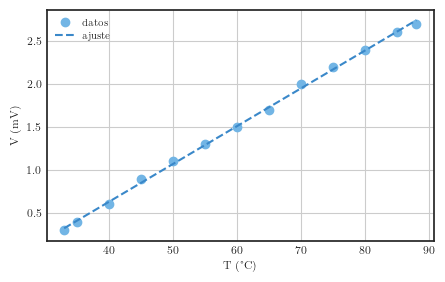

In [173]:
figure1 = plt.figure(figsize=(5, 3))

plt.plot(T_tupla, V_tupla, 'o', label = 'datos')
plt.plot(T_tupla, 0.044*T_tupla-1.13, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'V (mV)')

plt.grid()
plt.legend()
plt.savefig('termopar.pdf', dpi=300)

## Termistor 10Kohm

In [174]:
R_10k = np.array(dF['R 10k (Kohms)'])
T_10k = np.array(dF['T 10k (grados)']) + 273

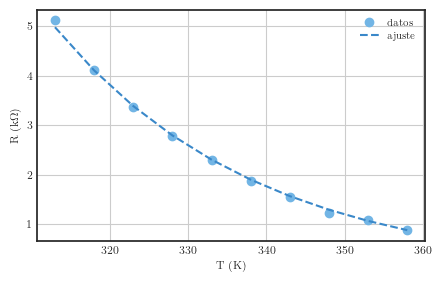

In [175]:
figure2 = plt.figure(figsize=(5, 3))

plt.plot(T_10k, R_10k, 'o', label = 'datos')
plt.plot(T_10k, 867213*np.exp(-0.038556*T_10k), '--', label = 'ajuste')

plt.xlabel(r'T (K)')
plt.ylabel(r'R (k$\Omega$)')

plt.grid()
plt.legend()
plt.savefig('termistor10k.pdf', dpi=300)

## Termistor 100k

In [176]:
R_100k = np.array(dF['R 100k (kOhm)'])
T_100k = np.array(dF['T 100k (grados)']) + 273

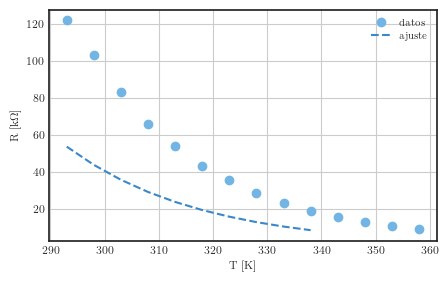

In [177]:
figure3 = plt.figure(figsize=(5, 3))

plt.plot(T_100k, R_100k, 'o', label = 'datos')
plt.plot(T_100k, 16700000*np.exp(-0.0404*T_10k), '--', label = 'ajuste')

plt.xlabel(r'T [K]')
plt.ylabel(r'R [k$\Omega$]')

plt.grid()
plt.legend()
plt.savefig('termistor100k.pdf', dpi=300)

## PT 100

In [178]:
R_pt100 = np.array(dF['R pt100 [Ohm]'])
T_pt100 = np.array(dF['T pt100 (grados)'])

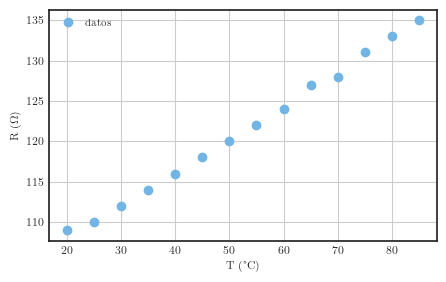

In [179]:
figure4 = plt.figure(figsize=(5, 3))

plt.plot(T_pt100, R_pt100, 'o', label = 'datos')

plt.xlabel(r'T (°C)')
plt.ylabel(r'R ($\Omega$)')

plt.grid()
plt.legend()
plt.savefig('pt100.pdf', dpi=300)

## LM35

In [180]:
V_LM = np.array(dF['V LM [mV]'])
T_LM = np.array(dF['T LM  [C]'])

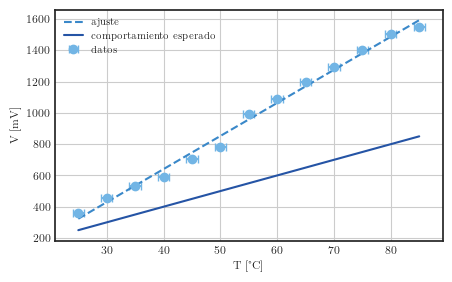

In [181]:
figure5 = plt.figure(figsize=(5, 3))

plt.errorbar(T_LM, V_LM, xerr=1, capsize=3,fmt='o', label = 'datos')
plt.plot(T_LM, 21.16*T_LM-205.81, '--', label = 'ajuste')
plt.plot(T_LM, 10*T_LM, label = 'comportamiento esperado')

plt.xlabel(r'T [°C]')
plt.ylabel(r'V [mV]')

plt.grid()
plt.legend()
plt.savefig('LM35.pdf', dpi=300)

In [182]:
from scipy.optimize import curve_fit
def lin(x,a,b):
  return a*x+b

In [183]:
arg, covs = curve_fit(lin, T_LM[:-1], V_LM[:-1])

In [184]:
arg

array([  21.16153846, -205.80769231])

In [185]:
np.diag(covs)

array([3.34669179e-01, 1.12950846e+03])

In [186]:
T_lm35=np.array([20,25,30,35,40,45,50,55,60,65,70,75,80,85])+273.15
V_lm35=np.array([201,250,301,353,400,450,503,552,599,651,699,749,800,846])

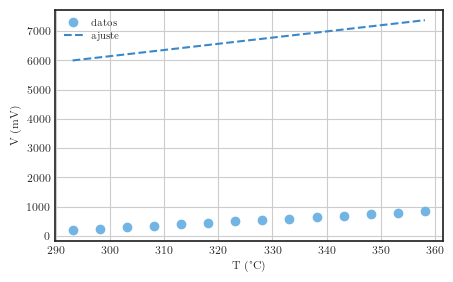

In [187]:
figure51 = plt.figure(figsize=(5, 3))

plt.plot(T_lm35, V_lm35, 'o', label = 'datos')
plt.plot(T_lm35, 21.16*T_lm35-205.81, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'V (mV)')

plt.grid()
plt.legend()
plt.savefig('LM35.pdf', dpi=300)

## Diodo

In [188]:
V_diodo = np.array(dF['V diodo[mV]'])
T_diodo = np.array(dF['T diodo [C]'])

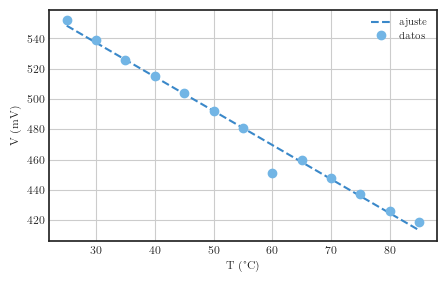

In [189]:
figure6 = plt.figure(figsize=(5, 3))

plt.errorbar(T_diodo, V_diodo, fmt = 'o', label = 'datos')
plt.plot(T_diodo, -2.25*T_diodo+604.61, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'V (mV)')

plt.grid()
plt.legend()
plt.savefig('diodo.pdf', dpi=300)

In [190]:
T_diodo49=np.array([15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])+273.15
V_diodo49=np.array([567,561,552,542,531,520,508,496,484,472,459,446,434,422,408])
T_diodo79=np.array([16,25,30,35,40,45,50,55,60,65,70,75,80,85])+273.15
V_diodo79=np.array([590,586,578,570,561,550,539,528,515,504,492,467,455,440])

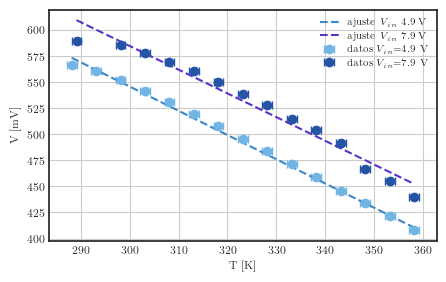

In [191]:
figure61 = plt.figure(figsize=(5, 3))

plt.errorbar(T_diodo49, V_diodo49, xerr=1, capsize=3, fmt='o', label = 'datos $V_{in}$=4.9 V')
plt.plot(T_diodo49, -2.33*T_diodo49+1245, '--', label = 'ajuste $V_{in}$ 4.9 V')

plt.errorbar(T_diodo79, V_diodo79, xerr=1, capsize=3, fmt='o', label = 'datos $V_{in}$=7.9 V')
plt.plot(T_diodo79, -2.28*T_diodo79+1269, '--', label = 'ajuste $V_{in}$ 7.9 V')

plt.xlabel(r'T [K]')
plt.ylabel(r'V [mV]')

plt.grid()
plt.legend()
plt.savefig('diodo.pdf', dpi=300)

## Alambre de cobre

In [192]:
R_Cu = np.array(dF['R Cu [ohm]'])
T_Cu = np.array(dF['T Cu [C]'])

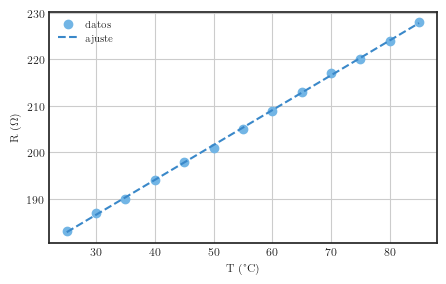

In [193]:
figure7 = plt.figure(figsize=(5, 3))

plt.plot(T_Cu, R_Cu, 'o', label = 'datos')
plt.plot(T_Cu, 0.7495*T_Cu+164.1, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'R ($\Omega$)')

plt.grid()
plt.legend()
plt.savefig('Cu.pdf', dpi=300)

In [194]:
Cu_args, Cu_covs = curve_fit(lin, R_Cu[R_Cu>0], T_Cu[R_Cu>0])

In [195]:
Cu_args, np.diag(Cu_covs)

(array([   1.33371442, -218.82183044]),
 array([7.23148752e-05, 3.06238478e+00]))

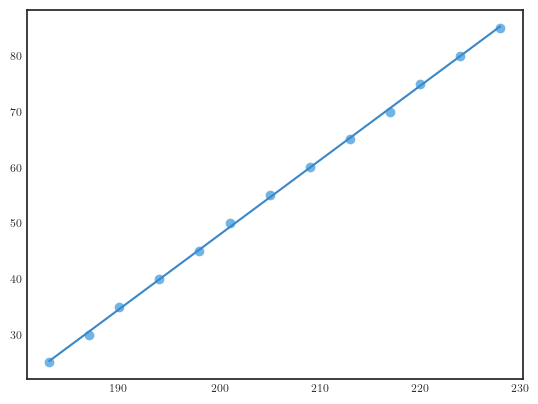

In [196]:
plt.plot(R_Cu, T_Cu, 'o')
plt.plot(R_Cu, lin(R_Cu, *Cu_args))

## Cal Termistor

In [197]:
def func_T(R, beta, A): return beta/(np.log(R)+A)

from scipy.optimize import curve_fit

In [198]:
cal_args, cal_covs = curve_fit(func_T, R_100k, T_100k)

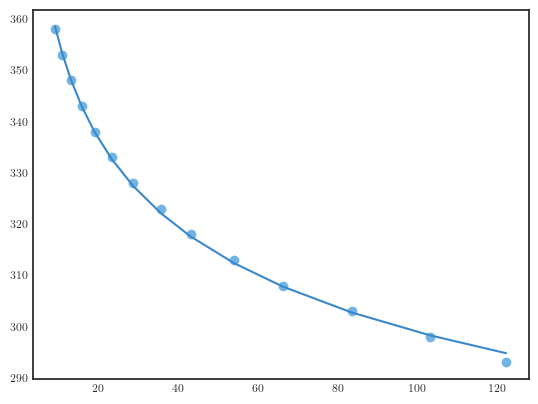

In [199]:
plt.plot(R_100k, T_100k, 'o')
plt.plot(R_100k, func_T(R_100k, *cal_args))
plt.show()

## Termómetro X

In [200]:
dfX = pd.read_csv('termoX.csv')

In [201]:
dfX.head()

,R termis [kohm],R X [ohm]
0,113.4,528
1,106.4,529
2,99.4,530
3,95.0,531
4,92.0,532


In [202]:
R_T = np.array(dfX['R termis [kohm]'])
R_X = np.array(dfX['R X [ohm]'])

T_X = func_T(R_T, *cal_args)-273

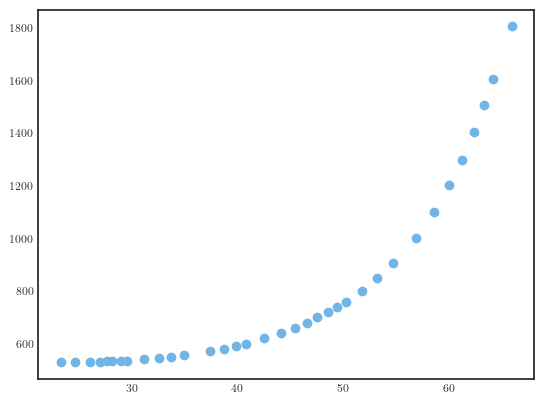

In [203]:
plt.plot(T_X, R_X, 'o')

In [204]:
def func_X(T, A, B, c): return A+B*np.exp(T/c)

x_args, x_covs = curve_fit(func_X, T_X, R_X, (500, 170, 10))

In [205]:
x_args, np.diag(x_covs)

(array([508.96979031,   1.22208204,   9.45458495]),
 array([2.75319075e+00, 2.40628486e-03, 3.05217942e-03]))

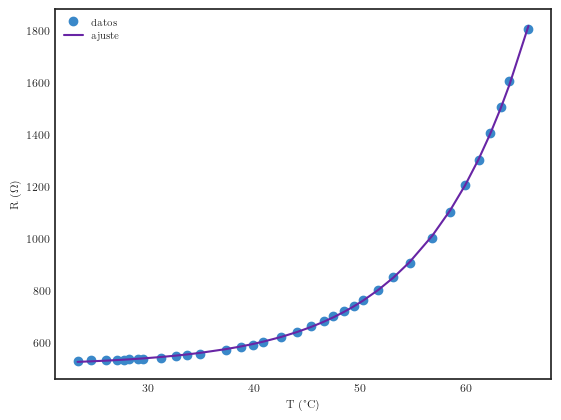

In [206]:
plt.plot(T_X, R_X, 'o', label = 'datos', color= "#3A88C9")
plt.plot(T_X, func_X(T_X, *x_args), label = 'ajuste', color = '#6825A5')

plt.xlabel('T (°C)')
plt.ylabel(r'R ($\Omega$)')

plt.legend()
plt.savefig('TermoX.pdf', dpi = 300)

## Puntos fijos

In [207]:
#ebullición
ebu_termo_alcohol =  88         #°C
ebu_termistor = 8.54            #kohm
ebu_alambre = 230               #ohm

#fusion
fus_termo_alcohol = 0           #°C
fus_termistor = 0.32            #Mohm
fus_alambre = 165               #ohm

In [208]:
fix_points = [
    {'termometro':'Alcohol', 'fusion':0, 'ebullicion':88},
    {'termometro':'Termistor', 'fusion':func_T(fus_termistor*1e3, *cal_args)-273, 'ebullicion':func_T(ebu_termistor, *cal_args)-273},
    {'termometro':'Alambre Cu', 'fusion':lin(fus_alambre, *Cu_args), 'ebullicion':lin(ebu_alambre, *Cu_args)},
]

In [209]:
fix_points = pd.DataFrame(fix_points)

In [210]:
fix_points

,termometro,fusion,ebullicion
0,Alcohol,0.000000,88.000000
1,Termistor,3.441983,88.095847
2,Alambre Cu,1.241049,87.932487


In [211]:
fix_points['fusion'].mean(), fix_points['fusion'].std()

(1.561010842137686, 1.7431561754259874)

In [212]:
fix_points['ebullicion'].mean(), fix_points['ebullicion'].std()

(88.00944472455978, 0.08208869006267398)